In [35]:
import sys
sys.path.append('../')
from core import datamodule
import yaml
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import numpy as np
from utils import parameter_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch

In [5]:
# Load in the params
params = yaml.load(open('../config.yaml', 'r'), Loader=yaml.FullLoader)

#Might want to change the batch - do that here.
#params['batch_size'] = 8

pm = parameter_manager.Parameter_Manager(params=params)

In [58]:
# Get the dataloader
dm = datamodule.select_data(pm.params_datamodule)
dm.prepare_data()
dm.setup(stage='fit')
dataloader = dm.val_dataloader()

In [59]:
# Grab a batch
batch = next(iter(dataloader))

In [60]:
#Split the batch up into the parts
near_field, far_field, radii, phase, derivatives = batch

In [61]:
#Print the shapes
# Expected shapes:
# near_field - [b, 2, 3, 176, 176] - [batch, [abs, angle], [ex, ey, ez], [x], [y]]
# far_field  - [b, 2, 3, 176, 176] - [batch, [abs, angle], [ex, ey, ez], [x], [y]]
# radii - [b, 9]
# phase - [b, 9]
# derivatives - [b, 6]

# Here, b is the batch size

print("near_field shape : {}".format(near_field.shape))
print("far_field shape : {}".format(far_field.shape))
print("radii shape : {}".format(radii.shape))
print("phase shape : {}".format(phase.shape))
print("derivatives shape : {}".format(derivatives.shape))

near_field shape : torch.Size([8, 3, 2, 176, 176])
far_field shape : torch.Size([8, 3, 2, 176, 176])
radii shape : torch.Size([8, 9])
phase shape : torch.Size([8, 9])
derivatives shape : torch.Size([8, 1, 6])


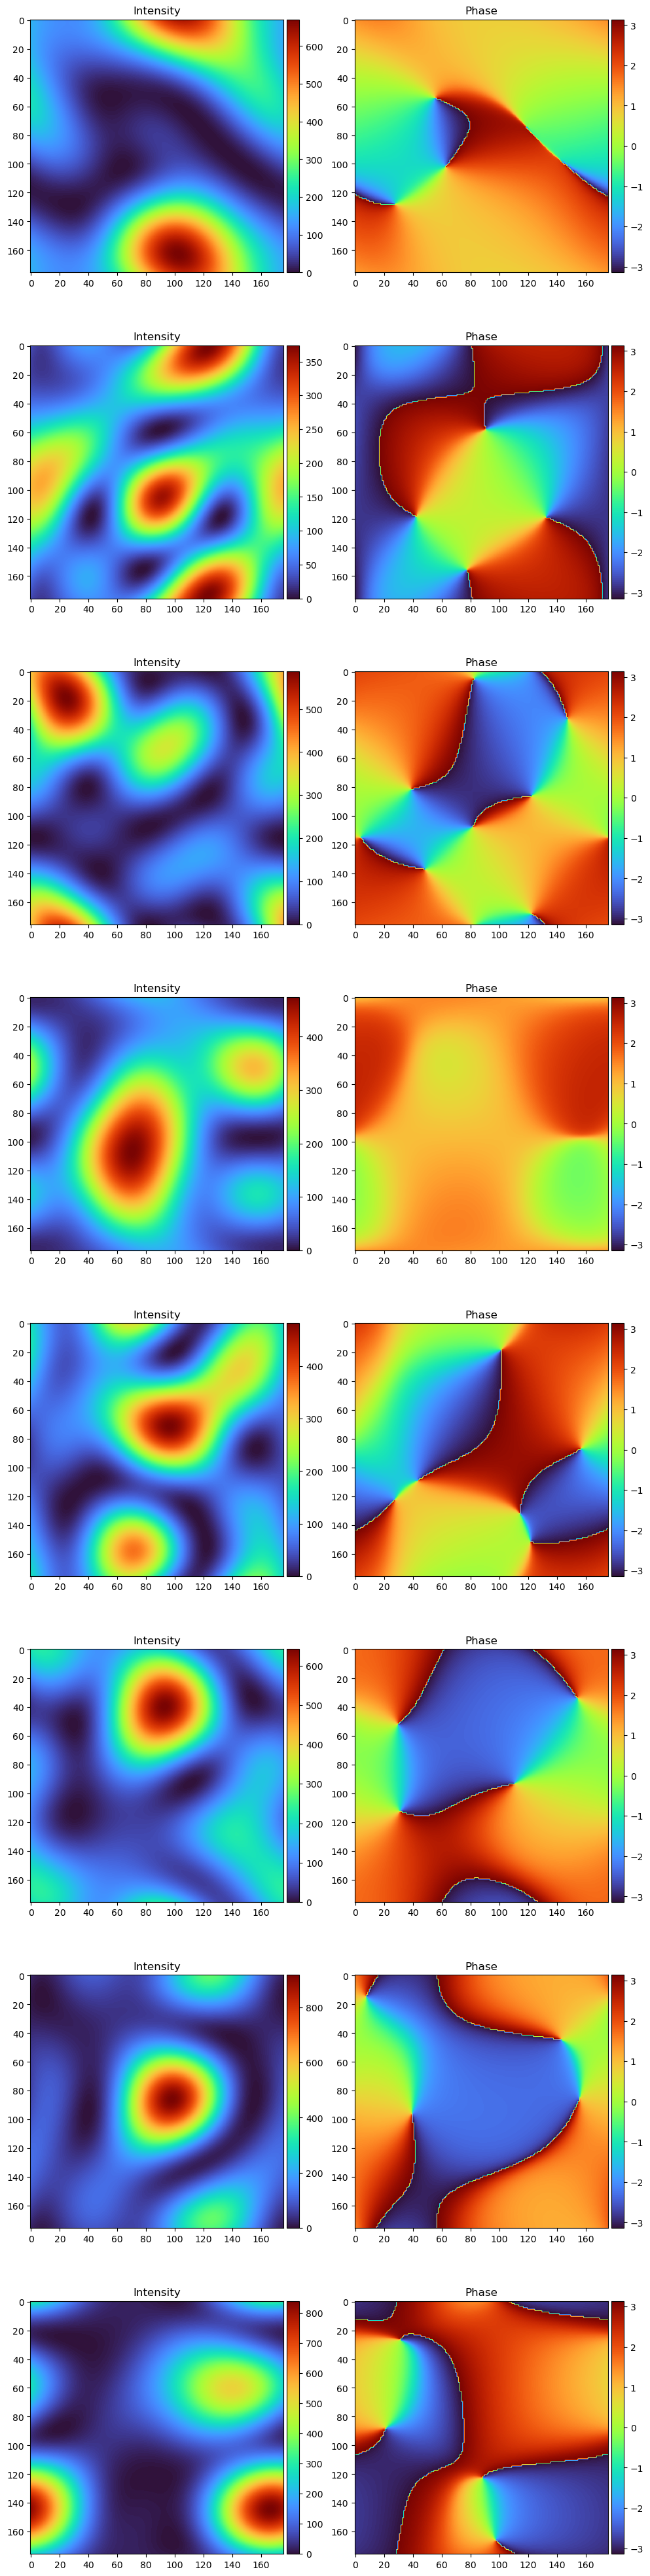

In [62]:
#Let's plot the y component of the near fields
fig, ax = plt.subplots(pm.batch_size, 2, figsize=(10, 5*pm.batch_size))

for i,nf in enumerate(near_field):
    y_component = nf[1]
    abs = y_component[0]
    angle = y_component[1]

    im1 = ax[i][0].imshow(abs**2, cmap='turbo', vmin=0)
    im2 = ax[i][1].imshow(angle, cmap='turbo', vmax=torch.pi, vmin=-torch.pi)

    divider = make_axes_locatable(ax[i][0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')

    divider = make_axes_locatable(ax[i][1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')
    
    ax[i][0].set_title('Intensity')
    ax[i][1].set_title('Phase')
plt.tight_layout()
plt.savefig('near_fields.pdf')

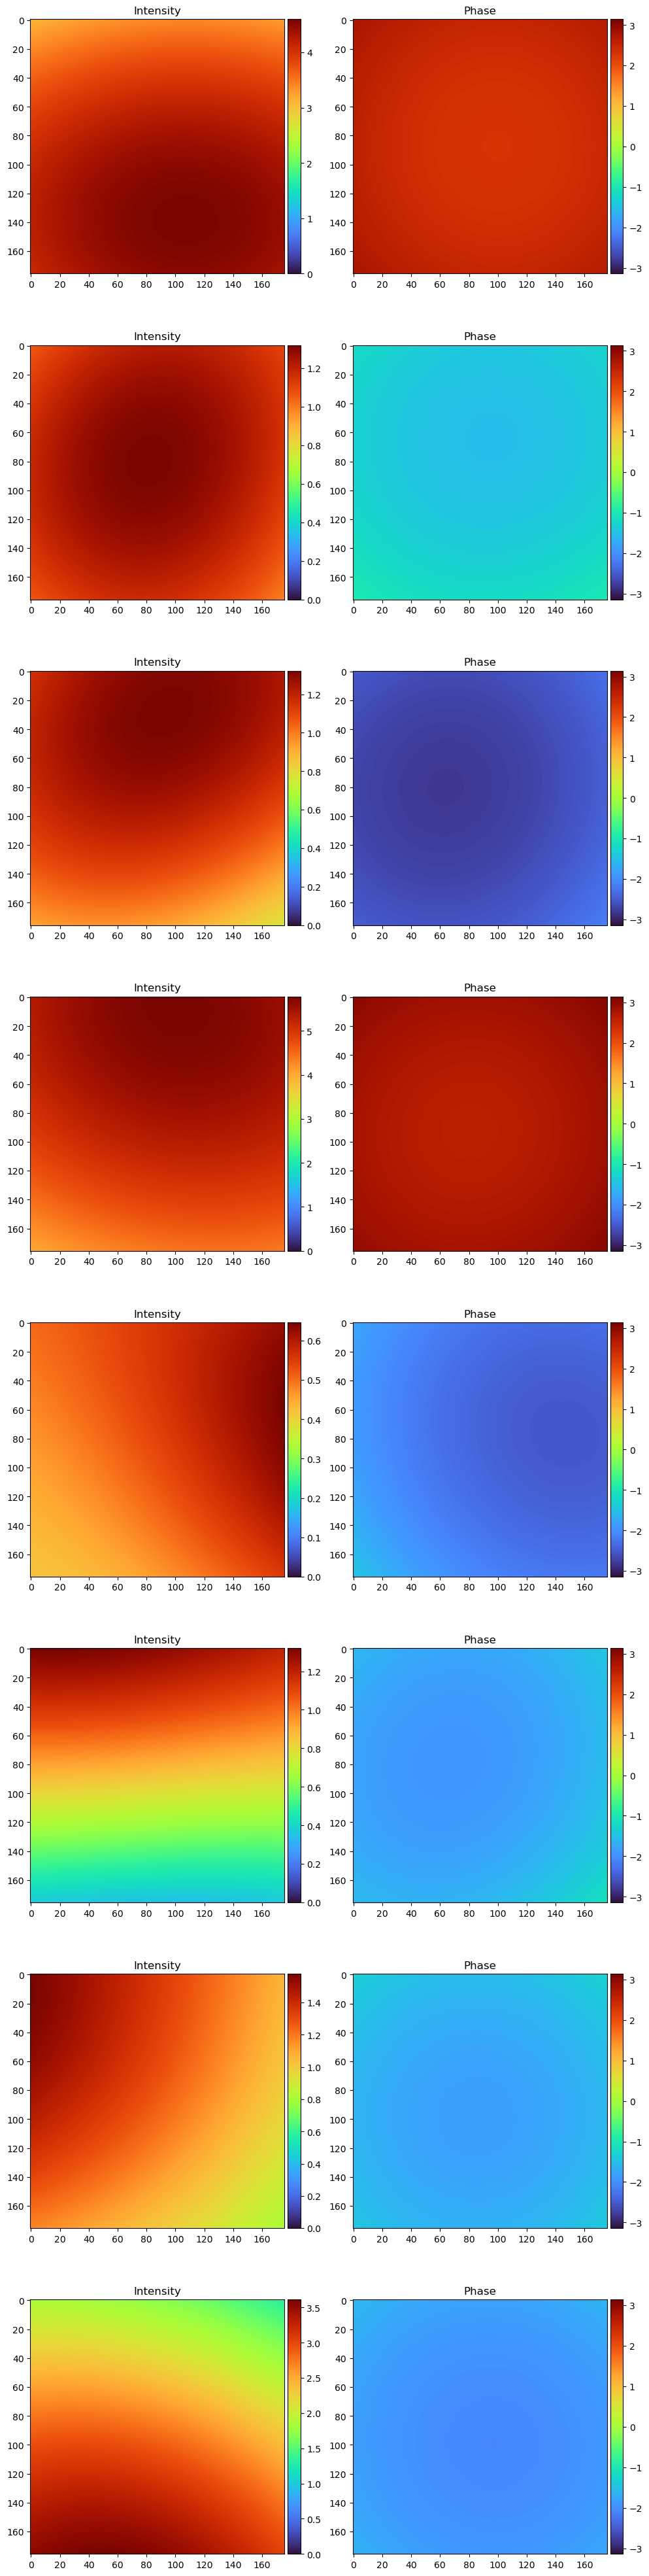

In [63]:
#Let's plot the y component of the near fields
fig, ax = plt.subplots(pm.batch_size, 2, figsize=(10, 5*pm.batch_size))

for i,nf in enumerate(far_field):
    y_component = nf[1]
    abs = y_component[0]
    angle = y_component[1]

    im1 = ax[i][0].imshow(abs**2, cmap='turbo', vmin=0)
    im2 = ax[i][1].imshow(angle, cmap='turbo', vmax=torch.pi, vmin=-torch.pi)

    divider = make_axes_locatable(ax[i][0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')

    divider = make_axes_locatable(ax[i][1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')
    
    ax[i][0].set_title('Intensity')
    ax[i][1].set_title('Phase')
plt.tight_layout()
plt.savefig('far_fields.pdf')

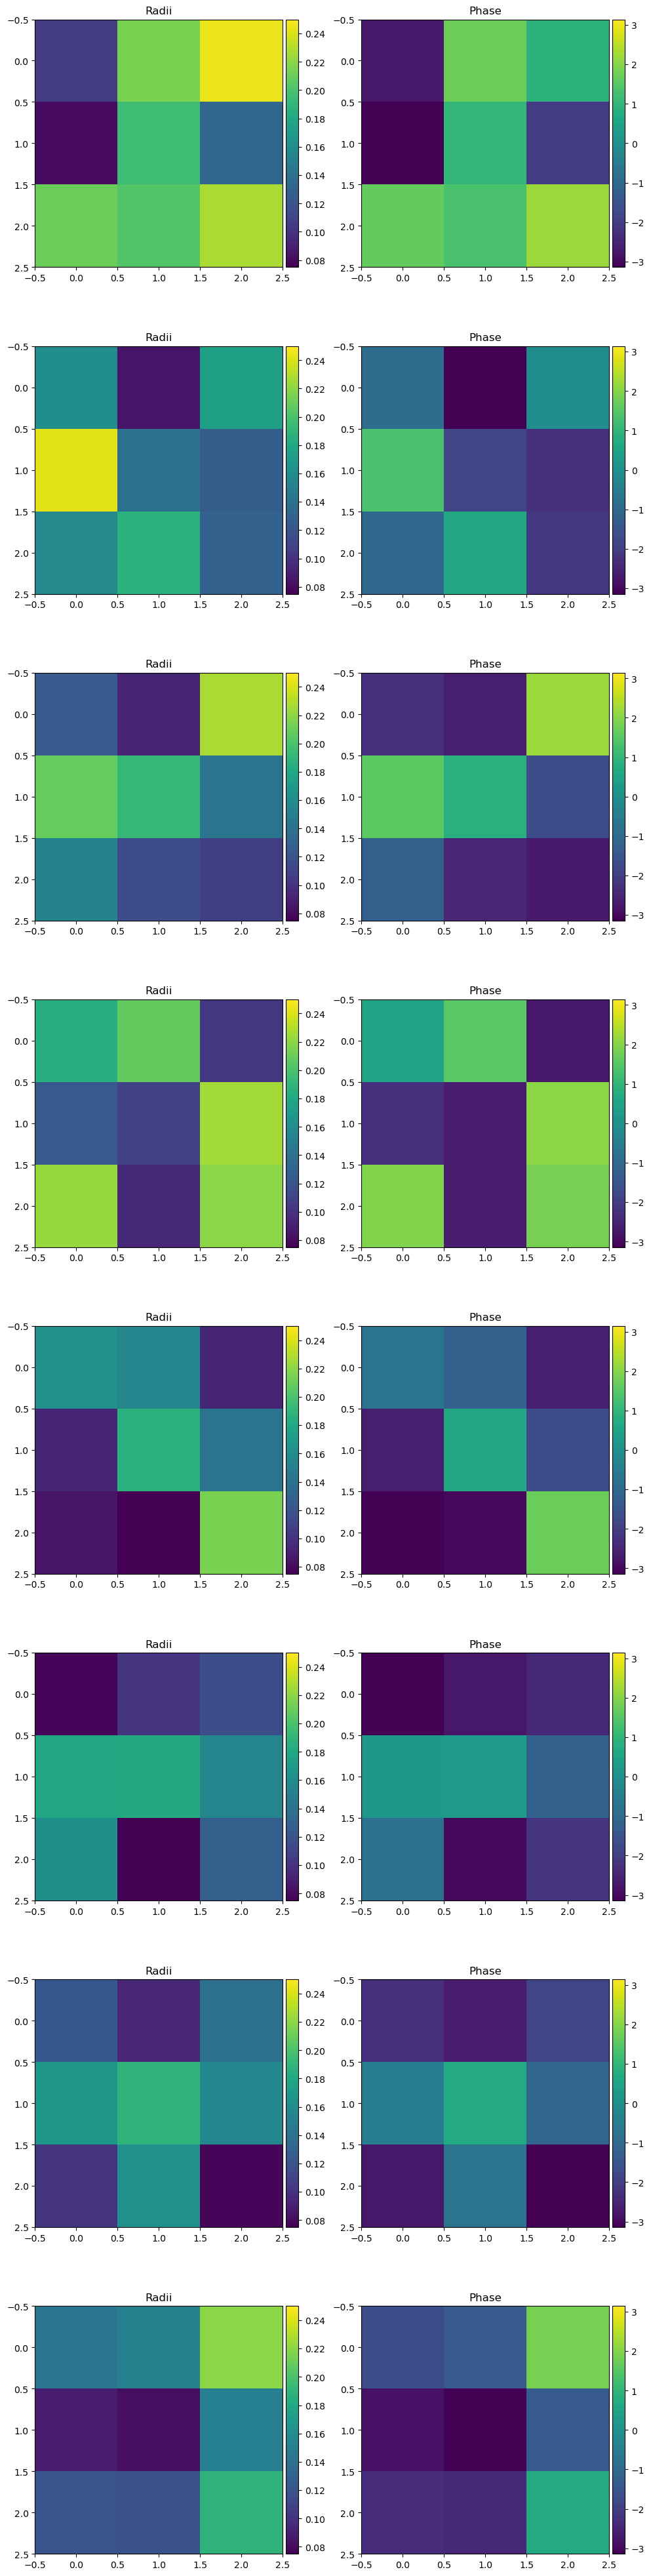

In [64]:
#Let's plot the radii
fig, ax = plt.subplots(pm.batch_size,2, figsize=(10, 5*pm.batch_size))

for i,(r,p) in enumerate(zip(radii,phase)):
    im1 = ax[i][0].imshow(r.view(3,3), vmin=0.075, vmax=0.250)
    im2 = ax[i][1].imshow(p.view(3,3), vmin=-torch.pi, vmax=torch.pi)

    divider = make_axes_locatable(ax[i][0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')

    divider = make_axes_locatable(ax[i][1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')
    
    ax[i][0].set_title('Radii')
    ax[i][1].set_title('Phase')

plt.tight_layout()